In [28]:
#Copy and paste the information from the api_keys and run the kernel, then remove them and the dependencies will be ok

In [290]:
#Import Dependenices
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import requests
import numpy as np
import json

api_key = api_key
my_encrypted_id = my_encrypted_id
my_account_id = my_account_id
# my_puuid = my_puuid
second_encrypted_id = second_encrypted_id
second_account_id = second_account_id
# second_puuid = second_puuid

In [230]:
#Read csv file for first person
first_person = pd.read_csv("Resources/League of Legends Player Analysis.csv")
first_person_df = pd.DataFrame(first_person)
first_person_df

,Player Name,Champion,Victory/Defeat,Kills,Deaths,Assists,Game Number
0,Umb12eon,Ornn,Defeat,4,9,27,1
1,Umb12eon,Ezreal,Defeat,8,11,10,2
2,Umb12eon,Karma,Defeat,8,9,10,3
3,Umb12eon,Sett,Victory,5,7,25,4
4,Umb12eon,Veigar,Victory,11,10,17,5
5,Umb12eon,Ekko,Victory,5,15,26,6
6,Umb12eon,Aurelian Sol,Defeat,7,14,18,7
7,Umb12eon,Ashe,Victory,12,11,30,8
8,Umb12eon,Kog Maw,Victory,9,8,17,9
9,Umb12eon,Morgana,Victory,8,10,22,10


In [231]:
#Read csv file for second person
second_person = pd.read_csv("Resources/League of Legends Second Player Analysis.csv")
second_person_df = pd.DataFrame(second_person)
second_person

,Player Name,Champion,Victory/Defeat,Kills,Deaths,Assists,Game Number
0,justrob86,Caitlyn,Defeat,4,5,9,1
1,justrob86,Master Yi,Victory,1,9,5,2
2,justrob86,Brand,Victory,5,6,15,3
3,justrob86,Vel'Koz,Victory,3,4,16,4
4,justrob86,Jinx,Victory,6,8,7,5
5,justrob86,Aphelios,Defeat,1,9,9,6
6,justrob86,Caitlyn,Defeat,1,11,5,7
7,justrob86,Jinx,Victory,3,15,13,8
8,justrob86,Jinx,Victory,4,3,3,9
9,justrob86,Kha'Zix,Defeat,10,10,9,10


In [232]:
# Combine csv files into one dataframe and sort to show bundles
combined_df = pd.merge(first_person_df, second_person_df, on = "Champion", how = "outer")
# sorted_df = combined_df.sort_values(["Champion_x", "Champion_y"], ascending = (True, True))
# sorted_df
combined_df

,Player Name_x,Champion,Victory/Defeat_x,Kills_x,Deaths_x,Assists_x,Game Number_x,Player Name_y,Victory/Defeat_y,Kills_y,Deaths_y,Assists_y,Game Number_y
0,Umb12eon,Ornn,Defeat,4.0,9.0,27.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Umb12eon,Ezreal,Defeat,8.0,11.0,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Umb12eon,Karma,Defeat,8.0,9.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Umb12eon,Sett,Victory,5.0,7.0,25.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Umb12eon,Sett,Victory,8.0,16.0,19.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Umb12eon,Veigar,Victory,11.0,10.0,17.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Umb12eon,Veigar,Defeat,5.0,13.0,18.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Umb12eon,Ekko,Victory,5.0,15.0,26.0,6.0,justrob86,Defeat,2.0,9.0,10.0,12.0
8,Umb12eon,Aurelian Sol,Defeat,7.0,14.0,18.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Umb12eon,Ashe,Victory,12.0,11.0,30.0,8.0,justrob86,Defeat,0.0,6.0,13.0,11.0


In [233]:
#unique champions
unique = combined_df[["Champion"]].nunique()
unique

Champion    28
dtype: int64

In [234]:
#Format table to look cleaner
cleaner_data_df = combined_df.rename(columns ={"Player Name_x": "Umb12eon",
                                      "Player Name_y": "Justrob86",
                                      "Victory/Defeat_x": "Umb12eon's V/D",
                                      "Victory/Defeat_y": "Justrob86's V/D",
                                      "Kills_x": "Umb12eon's Kills",
                                      "Kills_y": "Justrob86's Kills",
                                      "Deaths_x": "Umb12eon's Deaths",
                                      "Deaths_y": "Justrob86's Deaths",
                                      "Assists_x": "Umb12eon's Assists",
                                      "Assists_y": "Justrob86's Assists",
                                      "Game Number_x": "U Game Number",
                                      "Game Number_y": "J Game Number"})
cleaner_data_df.sort_values(by="Champion")

,Umb12eon,Champion,Umb12eon's V/D,Umb12eon's Kills,Umb12eon's Deaths,Umb12eon's Assists,U Game Number,Justrob86,Justrob86's V/D,Justrob86's Kills,Justrob86's Deaths,Justrob86's Assists,J Game Number
12,Umb12eon,Aphelios,Victory,12.0,9.0,18.0,12.0,justrob86,Defeat,1.0,9.0,9.0,6.0
9,Umb12eon,Ashe,Victory,12.0,11.0,30.0,8.0,justrob86,Defeat,0.0,6.0,13.0,11.0
8,Umb12eon,Aurelian Sol,Defeat,7.0,14.0,18.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,Brand,NaN,NaN,NaN,NaN,NaN,justrob86,Victory,5.0,6.0,15.0,3.0
21,NaN,Caitlyn,NaN,NaN,NaN,NaN,NaN,justrob86,Defeat,1.0,11.0,5.0,7.0
20,NaN,Caitlyn,NaN,NaN,NaN,NaN,NaN,justrob86,Defeat,4.0,5.0,9.0,1.0
7,Umb12eon,Ekko,Victory,5.0,15.0,26.0,6.0,justrob86,Defeat,2.0,9.0,10.0,12.0
1,Umb12eon,Ezreal,Defeat,8.0,11.0,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,Jinx,NaN,NaN,NaN,NaN,NaN,justrob86,Victory,4.0,8.0,21.0,18.0
27,NaN,Jinx,NaN,NaN,NaN,NaN,NaN,justrob86,Victory,4.0,3.0,3.0,9.0


In [235]:
#Drop N/A values
dropped_na_df = cleaner_data_df.dropna()
dropped_na_df


,Umb12eon,Champion,Umb12eon's V/D,Umb12eon's Kills,Umb12eon's Deaths,Umb12eon's Assists,U Game Number,Justrob86,Justrob86's V/D,Justrob86's Kills,Justrob86's Deaths,Justrob86's Assists,J Game Number
7,Umb12eon,Ekko,Victory,5.0,15.0,26.0,6.0,justrob86,Defeat,2.0,9.0,10.0,12.0
9,Umb12eon,Ashe,Victory,12.0,11.0,30.0,8.0,justrob86,Defeat,0.0,6.0,13.0,11.0
12,Umb12eon,Aphelios,Victory,12.0,9.0,18.0,12.0,justrob86,Defeat,1.0,9.0,9.0,6.0
13,Umb12eon,Nidalee,Defeat,8.0,9.0,10.0,13.0,justrob86,Victory,12.0,4.0,29.0,17.0
18,Umb12eon,Vel'Koz,Victory,13.0,9.0,25.0,19.0,justrob86,Victory,3.0,4.0,16.0,4.0


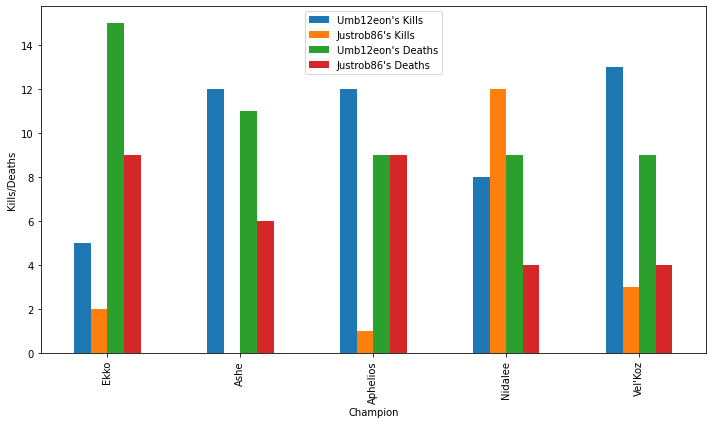

In [236]:
# Bar chart with pandas
champion_kills = dropped_na_df[["Champion","Umb12eon's Kills","Justrob86's Kills", 
                                "Umb12eon's Deaths", "Justrob86's Deaths"]]
champion_kills = champion_kills.set_index("Champion")
champion_kills.plot(kind = "bar", figsize = (10,6))
plt.ylabel("Kills/Deaths")
plt.tight_layout()
plt.savefig("Images/Same_Champion_Comparison.png")

In [ ]:
labels = ["Ekko", "Ashe", "Aphelios", "Nidalee", "Vel'Koz"]
sizes = [11,9,13,7]
colors = ["Blue", "Red", "Purple", "Green"]
explode = [0.1,0.1,0.1,0.1]
plt.pie(sizes, explode = explode, labels=labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 180)
fig = plt.gcf()
fig.set_size_inches(7,7)

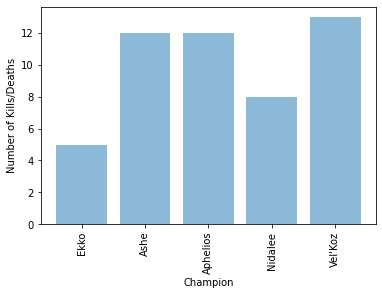

In [237]:
# Bar chart with MPL
# plt.figure(10,6)
x_axis = np.arange(len(dropped_na_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, dropped_na_df["Umb12eon's Kills"], alpha = 0.5, align = "center")
plt.xlabel("Champion")
plt.ylabel("Number of Kills/Deaths")
plt.xticks(tick_locations, dropped_na_df["Champion"], rotation = "vertical")
plt.show()

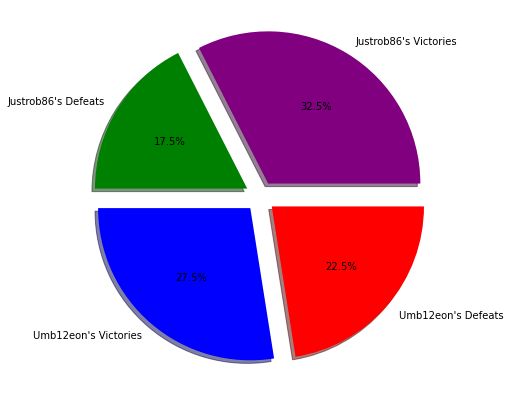

In [244]:
# Pie chart with MPL
labels = ["Umb12eon's Victories", "Umb12eon's Defeats", "Justrob86's Victories", "Justrob86's Defeats"]
sizes = [11,9,13,7]
colors = ["Blue", "Red", "Purple", "Green"]
explode = [0.1,0.1,0.1,0.1]
plt.pie(sizes, explode = explode, labels=labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 180)
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.savefig("Images/End_game_comparison.png")
plt.show()

In [294]:
#Top Champions for both PLayers 
champions_one_url = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + my_encrypted_id + "?" + "api_key=" + api_key
champions_response_one = requests.get(champions_one_url).json()
champions_response_one

[{'championId': 25,
  'championLevel': 5,
  'championPoints': 36290,
  'lastPlayTime': 1603343065000,
  'championPointsSinceLastLevel': 14690,
  'championPointsUntilNextLevel': 0,
  'chestGranted': False,
  'tokensEarned': 0,
  'summonerId': '9nEVtof3DmxVx1XGnYBE5NATYI4xG6kIlUfQ7MwdHdyICE4'},
 {'championId': 21,
  'championLevel': 5,
  'championPoints': 27794,
  'lastPlayTime': 1601603538000,
  'championPointsSinceLastLevel': 6194,
  'championPointsUntilNextLevel': 0,
  'chestGranted': True,
  'tokensEarned': 0,
  'summonerId': '9nEVtof3DmxVx1XGnYBE5NATYI4xG6kIlUfQ7MwdHdyICE4'},
 {'championId': 26,
  'championLevel': 5,
  'championPoints': 27009,
  'lastPlayTime': 1599190984000,
  'championPointsSinceLastLevel': 5409,
  'championPointsUntilNextLevel': 0,
  'chestGranted': True,
  'tokensEarned': 0,
  'summonerId': '9nEVtof3DmxVx1XGnYBE5NATYI4xG6kIlUfQ7MwdHdyICE4'},
 {'championId': 45,
  'championLevel': 5,
  'championPoints': 24028,
  'lastPlayTime': 1603519573000,
  'championPointsSin

In [295]:
champions_two_url = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + second_encrypted_id + "?" + "api_key=" + api_key
champions_response_two = requests.get(champions_two_url).json()
champions_response_two

[{'championId': 22,
  'championLevel': 5,
  'championPoints': 48401,
  'lastPlayTime': 1603523338000,
  'championPointsSinceLastLevel': 26801,
  'championPointsUntilNextLevel': 0,
  'chestGranted': True,
  'tokensEarned': 0,
  'summonerId': '9gHtb7X5uABfiwl3lwy09qaZJqR77m2YtD5DRfr8WQalJ94'},
 {'championId': 222,
  'championLevel': 5,
  'championPoints': 45137,
  'lastPlayTime': 1603614986000,
  'championPointsSinceLastLevel': 23537,
  'championPointsUntilNextLevel': 0,
  'chestGranted': True,
  'tokensEarned': 0,
  'summonerId': '9gHtb7X5uABfiwl3lwy09qaZJqR77m2YtD5DRfr8WQalJ94'},
 {'championId': 11,
  'championLevel': 5,
  'championPoints': 31173,
  'lastPlayTime': 1603777453000,
  'championPointsSinceLastLevel': 9573,
  'championPointsUntilNextLevel': 0,
  'chestGranted': True,
  'tokensEarned': 0,
  'summonerId': '9gHtb7X5uABfiwl3lwy09qaZJqR77m2YtD5DRfr8WQalJ94'},
 {'championId': 4,
  'championLevel': 5,
  'championPoints': 25711,
  'lastPlayTime': 1602401964000,
  'championPointsSin

'Resources/champion.jsonp'
